# Анализ данных сервиса аренды самокатов (NDA)

В рамках работы необходимо проанализировать данные сервиса аренды самокатов, проверить ряд гипотез и сделать выводы, основанные на проведенном исследовании.

**Цель исследования** - проанализировать данные и проверить гипотезы, которые помогут бизнесу вырасти.

**Этапы исследования:**
1. Загрузка данных - на данном этапе подключаемся к датасетам и проверяем корректность подключения данных;
2. Предобработка данных - проверяем данные на пропуски, дубликаты, а также соответствие типам данных заявленному в каждой колонке;
3. Исследовательский анализ данных - проводим исследовательский анализ данных, смотрим на тенденции и закономерности в данных, строим распределения и характеризуем датасет;
4. Объединение данных - так как данные представлены в нескольких датасетах, то объединяем данные для тестирования дальнейших гипотез;
5. Подсчет выручки - рассчитываем выручку;
6. Проверка гипотез - проводим статистические тесты на проверку поставленных гипотез (перечислены в соответствующем блоке);
7. Распределения - отвечает на задачи бизнеса при помощи построения распределений;
8. Выводы - формулируем общие выводы по проведенному исследованию.

**Данные** представлены в виде трех датасетов (информация по пользователям, поездкам и подпискам) в формате `.csv`, на базе которых будет создан единый датасет для проверки статистических гипотез. Подробные описания датасетов представлены в рамках этапа загрузки данных.

In [1]:
# импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st
from math import sqrt

#### Шаг 1. Загрузка данных

In [2]:
# подключаем датасеты и проверяем корректность подключения
users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [3]:
# проверяем датасет с информацией о пользователях
users.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
# выведем общную информацию о датасете
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Видим, что в датасете присутствуют 5 колонок:
- `user_id` - уникальный идентификатор пользователя, тип данный `int64`, категориальная переменная;
- `name` - имя пользователя, тип данных `object`, в данном случае - строковые значения, категориальная переменная;
- `age` - возраст пользователя, тип данных `int64`, категориальная переменная;
- `city` - город проживания пользователя, тип данных `object`, в данном случае снова строковые значения, категориальная переменная;
- `subscription_type` - тип подписки, тип данных `object`, строковые значения, категориальная переменная.

Данные представлены в полном объеме.

In [5]:
# проверяем датасет с информацией о поездках
rides.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
# выведем общную информацию о датасете
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В датасете присутствуют 4 колонки:
- `user_id` - уникальный идентификатор пользовател, тип данных `int64`, категориальная переменная - по значениям из данного столбца будут проводиться объединения двух таблиц;
- `distance` - расстояние поездки в метрах, тип данных `float64`, количественная переменная;
- `duration` - продолжить поездки в минутах, тип данных `float64`, количественная переменная;
- `date` - дата поездки, тип данных `object`, что соответствует строковому значению. Для удобной работы с датой необходимо перевести данную колонку в тип `datetime`.

Данные представлены в полном объеме.

In [7]:
# проверяем датасет с информацией о подписках
subscriptions.head(5)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
# выведем общную информацию о датасете
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В датасете присутствуют 4 колонки:
- `subscription_type  ` - тип подписки, тип данных `object`, категориальная переменная, строковые значения, по данной колонке будут проводиться объединения двух таблиц;
- `minute_price` - стоимость минуты, тип данных `int64`, количественная переменная;
- `start_ride_price` - стоимость начала поездки, тип данных `int64`, количественная переменная;
- `subscription_fee` - стоимость подписки, тип данных `int64`, количественная переменная;

Данные представлены в полном объеме. Все данные отображаются корректно, можно переходить к этапу предобработки данных.

#### Шаг 2. Предобработка данных

В рамках данного этапа проверим все три датасета на наличие пропусков, дубликатов, а также несоотвествий в типах данных. Также для проведения дальнейшего исследования выделим номер месяца из даты. Начнем с анализа пропусков.

In [9]:
# посмотрим на пропуски в датасете с информацией по пользователям
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [10]:
# посмотрим на пропуски в датасете с информацией по поездкам
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [11]:
# посмотрим на пропуски в датасете с информацией по подпискам
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Количество пропусков во всех датасетах равно нулю, данные представлены в полном виде. Аналогичным образом проверим датасеты на наличие явных дубликатов.

In [12]:
# посмотрим на дубликаты в датасете с информацией по пользователям
users.duplicated().sum()

31

Видим, что в датасете присутствуют дубликаты. Выведем первые пять значений на экран, чтобы понять причину дублей.

In [13]:
# выведем дубликаты на экран
users[users.duplicated()].head()

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free


In [14]:
# проверим дубликаты по соответствию другим значениям
users.merge(users[users.duplicated()].head(), on='user_id', how='right')

,user_id,name_x,age_x,city_x,subscription_type_x,name_y,age_y,city_y,subscription_type_y
0,293,Агата,26,Краснодар,ultra,Агата,26,Краснодар,ultra
1,293,Агата,26,Краснодар,ultra,Агата,26,Краснодар,ultra
2,16,Амалия,27,Краснодар,ultra,Амалия,27,Краснодар,ultra
3,16,Амалия,27,Краснодар,ultra,Амалия,27,Краснодар,ultra
4,909,Константин,20,Екатеринбург,free,Константин,20,Екатеринбург,free
5,909,Константин,20,Екатеринбург,free,Константин,20,Екатеринбург,free
6,403,Полина,19,Сочи,ultra,Полина,19,Сочи,ultra
7,403,Полина,19,Сочи,ultra,Полина,19,Сочи,ultra
8,908,Рустам,30,Тюмень,free,Рустам,30,Тюмень,free
9,908,Рустам,30,Тюмень,free,Рустам,30,Тюмень,free


Видим, что дубликаты ничем не отличаются, поэтому удалим их, чтобы не задваивать значения в рамках анализа.

In [15]:
# избавимся от дубликатов
users = users.drop_duplicates().reset_index(drop=True)
users.duplicated().sum()

0

После удаление данных строк дубликатов в датасете с информацией по пользователям не осталось. Далее проделаем аналогичное с датасетами по поездкам и подпискам.

In [16]:
# посмотрим на дубликаты в датасете с информацией по поездкам
rides.duplicated().sum()

0

In [17]:
# посмотрим на дубликаты в датасете с информацией по подпискам
subscriptions.duplicated().sum()

0

Дубликаты в данных датасетах отсутствуют, поэтому ничего предпринимать не нужно. Далее обработаем типы данных: ранее при описании данных было указано на то, что необходимо поменять тип данных в колонке `date` датасета с информацией по поездкам.

In [18]:
# проверяем типы данных в датасете по поездкам
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


У колонки `date` тип данных установлен в качестве `object`, что, скорее всего, указывает на строчный формат. Поменяем тип данных в данной колонке на `datetime`, а также сразу же выделим месяц, так как данная колонка потребуется нам в рамках проведения дальнейшего анализа. Для начала проверим то, за какой период представлены данные, чтобы не допустить ошибки при дальнейших группировках по месяцам (например, если данные будут присутствовать за 2 года и более).

In [19]:
# рассмотрим диапазон дат в датасете
print('Первой датой в датасете является', rides['date'].min(), ', последней датой в датасете является', rides['date'].max())

Первой датой в датасете является 2021-01-01 , последней датой в датасете является 2021-12-30


Видим, что данные представлены только за 2021 год в полном объеме: с 1 января по 30 декабря. Поменяем тип данных и добавим дополнительную колонку с месяцем.

In [20]:
# изменяем тип данных в date на datetime
rides['date'] = pd.to_datetime(rides['date'], format='%Y.%m.%d')

# добавляем колонку с месяцем
rides['month'] = rides['date'].dt.month
rides['date'].dtype

dtype('<M8[ns]')

Формат данных был успешно изменен, а колонка с месяцем создана. Дальнейших изменений на требуется.

**Подведем промежуточные выводы:**
- В рамках данного этапа исследования подключенные датасеты были проверены на наличие пропусков, в ходе работы пропусков выявлено не было, данные представлены в полном объеме;
- Также датасеты были проанализированы на наличие дубликатов, где только в одном датасете с информацией о пользователях были выявлены дубликаты, проверены и удалены, чтобы получить корректные результаты исследования в дальнейшем;
- Были проверены указанные типы данных на соответствия значениям в колонках, отклонения были найдены только в одном датасете с информацией по поездкам, что привело к изменению типа `object` на `datetime`. Также месяц был выделен в отдельную колонку `month` для проведения дальнейшего исследования.

Таким образом, в рамках данного этапа была проведена предобработка данных, данные готовы к работе.

#### Шаг 3. Исследовательский анализ данных

В рамках данного этапа проведем исследовательский анализ данных по следующим факторам:
- частота встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.

Начнем с анализа частоты встречаемости городов.

##### Анализ частоты встречаемости городов

Информация по городам представлена в датасете с пользователями. Построим столбчатую диаграмму распределения пользователей приложения по городам и отсортируем по убыванию.

In [21]:
# группируем данные по городам и считаем уникальное количество пользователей, используем метод count(), так как из датасета 
# видно, что данные представлены в уникальном виде
users_grouped_by_city = users.groupby('city')['user_id'].count().sort_values(ascending=False)\
                        .reset_index()

# рассчитаем доли каждого города в процентном соотношении
users_grouped_by_city['user_id_perc_count'] = (users_grouped_by_city['user_id'] / users_grouped_by_city['user_id'].sum()) * 100

In [22]:
# отобразим данные в табличном виде
users_grouped_by_city

,city,user_id,user_id_perc_count
0,Пятигорск,219,14.276402
1,Екатеринбург,204,13.298566
2,Ростов-на-Дону,198,12.907432
3,Краснодар,193,12.581486
4,Сочи,189,12.320730
5,Омск,183,11.929596
6,Тюмень,180,11.734029
7,Москва,168,10.951760


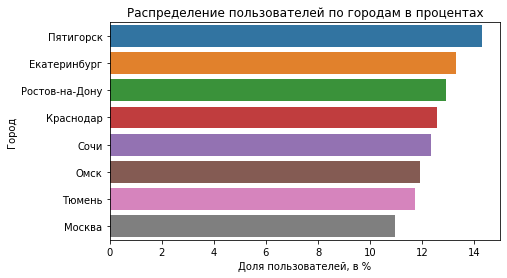

In [23]:
# построим график
plt.figure(figsize=(7, 4))
sns.barplot(data=users_grouped_by_city, x='user_id_perc_count', y='city', orient='h')
plt.xlabel('Доля пользователей, в %')
plt.ylabel('Город')
plt.title('Распределение пользователей по городам в процентах')
plt.show()

На графике видно, что большинство пользователей приложения из Пятигорска, Екатеринбурга и Ростова-на-Дону. При этом важно отметить, что между городами не сильная разница: например, между самым и менее крупными городами по количеству пользователей всего лишь около 3% разницы. Тем не менее, важно учитывать региональный фактор: так, Москва значительно больше Пятигорска, но при этом пользователей оттуда не на много, но меньше. Возможно, в Москве пользуются спросом другие виды самокатов, которых в регионах нет, в обратном случае количество пользователей из Москвы превышало бы крупные города. Далее проанализируем соотношение пользователей с подпиской и без нее.

##### Анализ соотношения пользователей с подпиской и без нее

Информация по подписке также доступна в датасете с информацией по пользователям. Сгруппируем данные для того, чтобы посмотреть соотношение пользователей с подпиской и без нее.

In [24]:
# группируем данные по типу подписки
users_grouped_by_st = users.groupby('subscription_type')['user_id'].count().sort_values(ascending=False)\
                        .reset_index()

# рассчитаем доли каждого города в процентном соотношении
users_grouped_by_st['st_perc_count'] = (users_grouped_by_st['user_id'] / users_grouped_by_st['user_id'].sum()) * 100

users_grouped_by_st

,subscription_type,user_id,st_perc_count
0,free,835,54.432855
1,ultra,699,45.567145


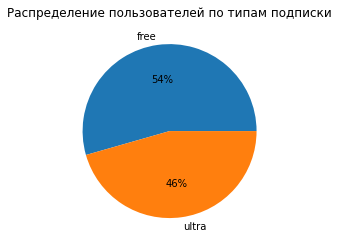

In [25]:
# построим график
plt.figure(figsize=(7, 4))
plt.pie(data=users_grouped_by_st, x='st_perc_count', labels='subscription_type', autopct='%.0f%%')
plt.title('Распределение пользователей по типам подписки')
plt.show()

На круговой диаграмме и в таблице видно, что пользователей без подписки больше, чем тех, кто оплатил подписку на тариф Ultra. При этом нельзя говорить о том, что разница слишком велика: чуть менее половины пользователей не оформили подписку в приложении, но не более. Рассмотрим распределение по типам подписки по городам.

In [26]:
# группируем данные по городам и типу подписки
users_grouped_by_st_and_city = users.groupby(['city', 'subscription_type'])['user_id'].count().sort_values(ascending=False)\
                                .reset_index()

# рассчитаем доли каждого города в процентном соотношении
users_grouped_by_st_and_city['st_perc_count'] = (users_grouped_by_st_and_city['user_id'] / users_grouped_by_st_and_city['user_id']\
                                                 .sum()) * 100

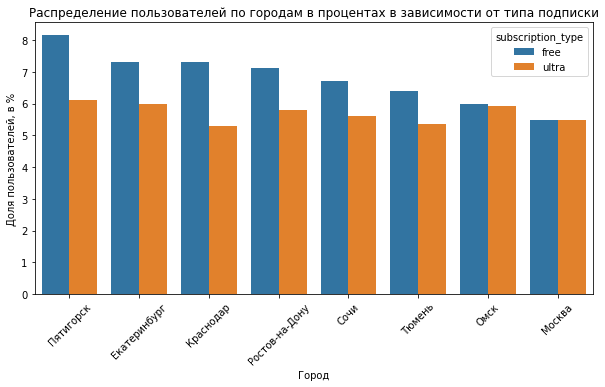

In [27]:
# построим график
plt.figure(figsize=(10, 5))
sns.barplot(data=users_grouped_by_st_and_city, x='city', y='st_perc_count', hue='subscription_type')
plt.xlabel('Город')
plt.ylabel('Доля пользователей, в %')
plt.title('Распределение пользователей по городам в процентах в зависимости от типа подписки')
plt.xticks(rotation=45)
plt.show()

На графике можно, что ни в одном городе количество платящих пользователей с тарифом Ultra не превышают количество пользователей с бесплатным тарифом. При этом можно говорить о том, что наибольший размах в количестве наблюдаютися у Пятигорска и Краснодара - 2%, а наименьший - Омска и Москвы, где значения практически идентичны.

##### Анализ возраста пользователей

Для составления полноценного портрета пользователей проанализириуем их в разрезе возраста, а также посмотрим на распределение возраста по городам и по типам подписки. Для анализа возраста построим гистограмму и диаграмму размаха: несмотря на то, что возраст, в основном, является дискретной величиной (если мы не вычисляем его вплоть до миллисекунд), значений признака слишком много, чтобы построить по ним столбчатую диаграмму.

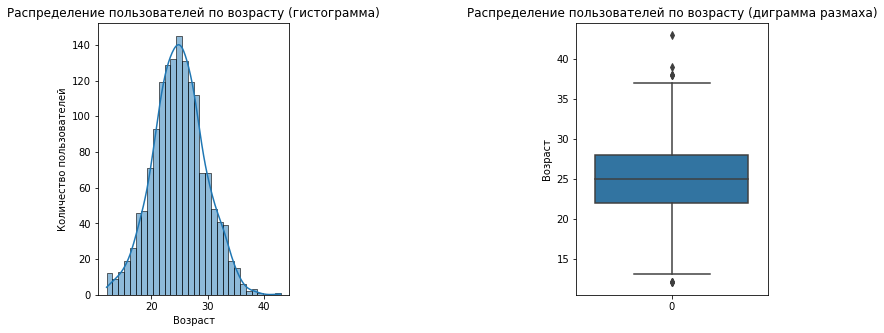

In [28]:
# зададим параметры для отображения графиков в одной строчке
figure, axes = plt.subplots(1, 2, figsize=(12, 5))
figure.subplots_adjust(wspace=1.5)

# построим графики
sns.histplot(data=users['age'], kde=True, ax=axes[0])
sns.boxplot(data=users['age'], ax=axes[1])

axes[0].set_title('Распределение пользователей по возрасту (гистограмма)')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество пользователей')

axes[1].set_title('Распределение пользователей по возрасту (диграмма размаха)')
axes[1].set_ylabel('Возраст')

plt.show()

In [29]:
# для дополнительной информации выведем показатели описательной статистики
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Оба графика предоставляют схожую информацию, но с разных углов: на гистограмме видно, что данные распределены близко к нормальному распределению, что вполне характерно для возрастных характеристик. На графике с диаграммой размаха видно, что медианный возраст генеральной совокупности составляет 25 лет, при этом минимальный возраст находится в районе 12 лет, а максимальный - 43. Стандартное отклонение составляет 4.5, что означает, что возраст отдельного пользователя отличается от среднего значения на 4.5 года. Есть несколько выбросов: например, один пользователь младше 13-14 лет (видимо, пользователь в возрасте 12 лет), а 3 старше 37-38. Поменяем параметр `bin` в гистограмме, чтобы увидеть более агрегированную картину.

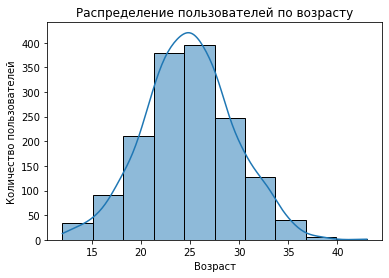

In [30]:
# построим графики
sns.histplot(data=users['age'], kde=True, bins=10)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по возрасту')
plt.show()

Видим, что большинство пользователей приложения находится в возрастном диапазоне 21-27 лет, поэтому можно сказать, что целевой аудиторией являются молодые люди, которые активно используют самокаты при передвижении. В меньшей степенью пользуются приложением пользователи младше 15-18 и старше 30 лет: первая группа представляет собой подростков, которые финансово, скорее всего, зависят от родителей, либо не испытывают необходимости в передвижениях на длительные дистанции, а пользователи в возрасте 30+ в меньшей степени склонны пользоваться новыми технологиями (особенно 35 лет и далее) - например, в силу того, что у них есть личный транспорт. Проанализируем данные по возрасту в связке с городами и типами подписки: ранее уже было обозначены, что значений возраста слишком много, поэтому целесообразно будет провести категоризацию и разбить группы на агрегированные возрастные категории.

In [31]:
# определяем диапазоны возрастов, шаг 10 лет (пользователей старше 50 лет в приложении нет, ограничимся этими значениями)
bins = [0, 10, 20, 30, 40, 50]

# создадим новую колонку с диапазонами при помощи соответствующего метода
users['age_group'] = pd.cut(users['age'], bins=bins, labels=[f"{i}-{i+9}" for i in range(0, 50, 10)])

In [32]:
# группируем данные по городам и возрастному диапазону
users_grouped_by_age_and_city = users.groupby(['city', 'age_group'])['user_id'].count().sort_values(ascending=False)\
                                .reset_index()

# рассчитаем доли каждого города в процентном соотношении
users_grouped_by_age_and_city['age_perc_count'] = (users_grouped_by_age_and_city['user_id'] / users_grouped_by_age_and_city['user_id']\
                                                 .sum()) * 100

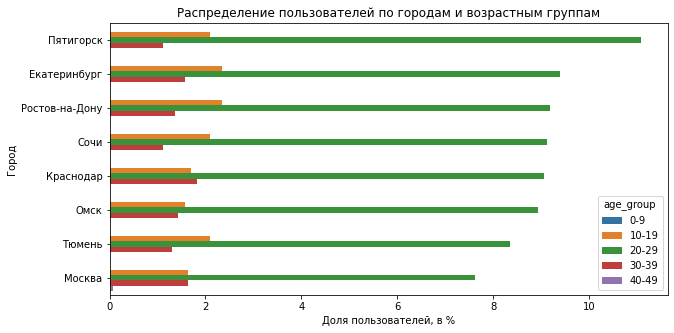

In [33]:
# построим график
plt.figure(figsize=(10, 5))
sns.barplot(data=users_grouped_by_age_and_city, x='age_perc_count', y='city', hue='age_group', orient='h')
plt.xlabel('Доля пользователей, в %')
plt.ylabel('Город')
plt.title('Распределение пользователей по городам и возрастным группам')
plt.show()

На графике можно заметить, что распределение во всех городах схожее: доминируют пользователи в возрасте 20-29 лет, на что было указано ранее, так как медианный возраст генеральной совокупности - 25 лет. В большей степени присутствуют пользователи в возрасте 10-19 лет, чем 30-39, однако данная тенденция нарушается в Москве, там показатели по данным возрастным группам находятся на одном уровне (вполне вероятно, что темп жизни в Москве другой, как и поведение пользователей - например, многе жители Москвы предпочитают не покупать автомобили в силу пробок и наличия метро, а от одной станции до другой как раз можно добраться на самокате). Проанализируем распределение возраста по типам подписки.

In [34]:
# группируем данные по типам подписки и возрастному диапазону
users_grouped_by_age_and_st = users.groupby(['subscription_type', 'age_group'])['user_id'].count().sort_values(ascending=False)\
                                .reset_index()

# рассчитаем доли каждого города в процентном соотношении
users_grouped_by_age_and_st['age_perc_count'] = (users_grouped_by_age_and_st['user_id'] / users_grouped_by_age_and_st['user_id']\
                                                 .sum()) * 100

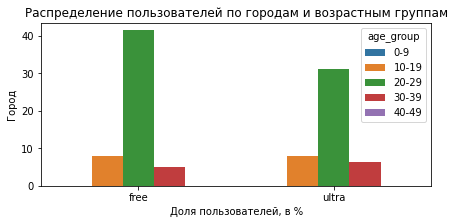

In [35]:
# построим график
plt.figure(figsize=(7, 3))
sns.barplot(data=users_grouped_by_age_and_st, x='subscription_type', y='age_perc_count', hue='age_group')
plt.xlabel('Доля пользователей, в %')
plt.ylabel('Город')
plt.title('Распределение пользователей по городам и возрастным группам')
plt.show()

В целом, видна аналогичная тенденция: пользователей в возрастном диапазоне 20-29 лет больше как в бесплатной версии приложения, так и на тарифе Ultra, а пользователей в возрасте 30-39 оказывается снова меньше всего. Далее проанализируем расстояния, которое пользователь преодолел за одну поездку.

##### Анализ расстояния, которое пользователь преодолел за одну поездку

Для анализа данных по поездкам нам необходимо обратиться к датасету с информацией по поездкам. Так как расстояние является непрерывной величиной, то рассматривать его будем также на двух графиках - гистограмме с заданным параметром `bins` для удобства анализа и диаграмме размаха.

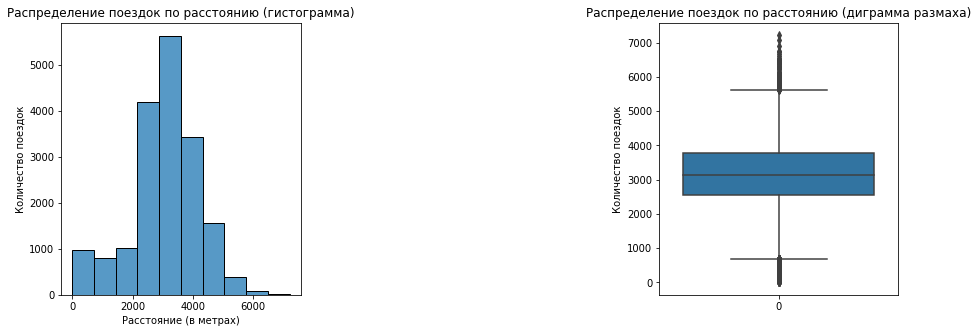

In [36]:
# зададим параметры для отображения графиков в одной строчке
figure, axes = plt.subplots(1, 2, figsize=(15, 5))
figure.subplots_adjust(wspace=1.5)

# построим графики
sns.histplot(data=rides['distance'], bins=10, ax=axes[0])
sns.boxplot(data=rides['distance'], ax=axes[1])

axes[0].set_title('Распределение поездок по расстоянию (гистограмма)')
axes[0].set_xlabel('Расстояние (в метрах)')
axes[0].set_ylabel('Количество поездок')

axes[1].set_title('Распределение поездок по расстоянию (диграмма размаха)')
axes[1].set_ylabel('Количество поездок')

plt.show()

На гистограмме видно, что большинство пользователей проезжают на самокатах от 2000 до 4000 м. (то есть, 2-4 км.). Медианным расстоянием являются поездки в районе 3000-3100 м., при этом минимальное расстояние на поездку составляет около 700-800 м., а максимальное - 5600-5700 м., имеются также несколько выбросов с еще более меньшими и большими расстояниями. Стоит отметить, что 2000-4000 м. выглядят логично: например, в регионах данное расстояние позволяет проехать несколько остановок и не пользоваться общественным транспортом, а в Москве, судя по данным в открытых источниках, среднее расстояние между станций метро составляет 1800 м., что указано в открытых источниках, например, <a href="https://hi-tech.mail.ru/review/101478-pochemu-v-metro-takie-dlinnye-peregony-mezhdu-stanciyami/#:~:text=%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D1%8F%D1%8F%20%D0%B4%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20%D0%BF%D0%BE%D0%B5%D0%B7%D0%B4%D0%BA%D0%B8%20%D0%B2%20%D0%9C%D0%BE%D1%81%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%BE%D0%BC,%D1%87%D0%B5%D0%BC%20%D0%B2%D0%BE%20%D0%B2%D1%81%D0%B5%D0%BC%20%D0%BE%D1%81%D1%82%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%BC%20%D0%BC%D0%B8%D1%80%D0%B5.">здесь</a>. Тем самым, можно предположить, что пользователи либо добираются до станции метро, либо перемещаются между ними. Объединим датасет с информацией по поездкам с датасетом с информацией о пользователях, чтобы проанализировать расстояние в разрезе городов, возрастных групп и типа подписки. Перед объедиением датасетов проведен категоризацию расстояния по аналогии с возрастными группами для упрощения анализа в дальнейшем.

In [37]:
# определяем диапазоны расстояния, шаг 1000 метров
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000]

# создадим новую колонку с диапазонами при помощи соответствующего метода
rides['distance_group'] = pd.cut(rides['distance'], bins=bins, labels=[f"{i}-{i+999}" for i in range(0, 6000, 1000)])

In [38]:
# объединяем датасеты, объединяем по столбцу user_id и параметру inner, чтобы в итоговый датасет вошли только значения из
# обоих датасетов (в случае наличия несовпадений)
df_users_and_rides = users.merge(rides, on="user_id", how="inner")

Рассчитаем средние расстояния поездок по городам, а также посмотрим на распределение пользователей по категориям расстояний по городам.

In [39]:
# группируем данные по городам и диапазоном расстояний, рассчитываем среднее значение
users_grouped_by_distance_and_cities_b = df_users_and_rides.groupby('city')['distance'].mean()\
                                       .sort_values(ascending=False).reset_index()

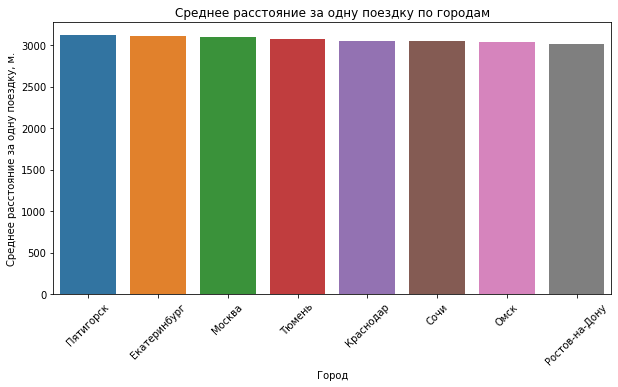

In [40]:
# построим график
plt.figure(figsize=(10, 5))
sns.barplot(data=users_grouped_by_distance_and_cities_b, x='city', y='distance')
plt.xlabel('Город')
plt.ylabel('Среднее расстояние за одну поездку, м.')
plt.title('Среднее расстояние за одну поездку по городам')
plt.xticks(rotation=45)
plt.show()

В целом, во всех городах среднее значение составляет чуть больше 3000 м. за поездку, что указывает на то, что среди городов прослеживается единая тенденция. Также проанализируем среднее расстояние за одну поездку по месяцам для определения наличия фактора сезонности (думаю, что анализировать совокупное расстояние для определения фактора сезонности смысла нет, так как компания могла увеличить количество пользователей, что исказит результаты анализа).

In [41]:
# группируем данные по месяцам и диапазоном расстояний, рассчитываем среднее значение
users_grouped_by_distance_and_month = rides.groupby('month')['distance'].mean().sort_values(ascending=False).reset_index()

# рассчитаем доли каждого месяца в процентном соотношении
users_grouped_by_distance_and_month['distance_perc_count'] = (users_grouped_by_distance_and_month['distance'] / 
                                                              users_grouped_by_distance_and_month['distance'].sum()) * 100

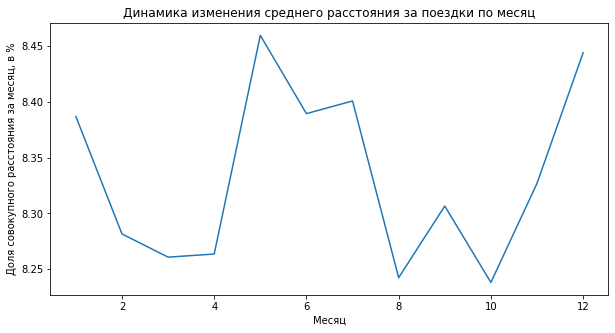

In [42]:
# построим график
plt.figure(figsize=(10, 5))
sns.lineplot(data=users_grouped_by_distance_and_month, x='month', y='distance_perc_count')
plt.xlabel('Месяц')
plt.ylabel('Доля совокупного расстояния за месяц, в %')
plt.title('Динамика изменения среднего расстояния за поездки по месяц')
plt.show()

На графике можно заметить совсем небольшое влияние фактора сезонности: среднее расстояние сокращается в феврале, а также идет на спад к концу лета, при этом рост наблюдается весной, летом и в декабре (возможно, как результат какой-либо рекламной кампании или же наличия выбросов именно в этот месяц). При этом разница в динамике не слишком большая и составляет 0.2% разницы между максимальным и минимальным показателями, что указывает на практическое отсутствие фактора сезонности. Рассмотрим распределение расстояний по городам по количеству пользователей.

In [43]:
# группируем данные по городам и диапазоном расстояний, снова считаем все user_id, а не уникальные, так как важна каждая поездка
users_grouped_by_distance_and_cities = df_users_and_rides.groupby(['city', 'distance_group'])['user_id'].count()\
                                       .sort_values(ascending=False).reset_index()

# рассчитаем доли каждого города в процентном соотношении
users_grouped_by_distance_and_cities['distance_perc_count'] = (users_grouped_by_distance_and_cities['user_id'] / 
                                                               users_grouped_by_distance_and_cities['user_id'].sum()) * 100

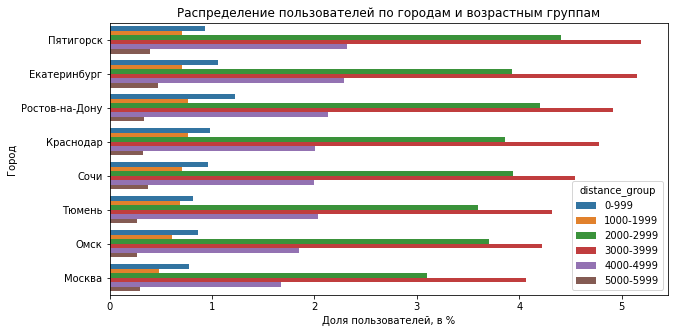

In [44]:
# построим график
plt.figure(figsize=(10, 5))
sns.barplot(data=users_grouped_by_distance_and_cities, x='distance_perc_count', y='city', hue='distance_group', orient='h')
plt.xlabel('Доля пользователей, в %')
plt.ylabel('Город')
plt.title('Распределение пользователей по городам и возрастным группам')
plt.show()

Данные на графике указывают на то, что во всех городах наблюдается также одинаковая тенденция по распределению расстояний среди всех пользователей, о чем уже было предположено ранее: наибольшее количество пользователей проежают от 2000 до 4000 м., а наиболее редкие расстояния составляют менее 999 м. и более 5000 м. Рассмотрим распределение продолжительности поездок по возрастным категориям.

In [45]:
# группируем данные по возрастным группам и диапазоном расстояний
users_grouped_by_distance_and_age = df_users_and_rides.groupby(['age_group', 'distance_group'])['user_id'].count()\
                                       .sort_values(ascending=False).reset_index()

# рассчитаем доли каждой возрастной группы в процентном соотношении
users_grouped_by_distance_and_age['distance_perc_count'] = (users_grouped_by_distance_and_age['user_id'] / 
                                                               users_grouped_by_distance_and_age['user_id'].sum()) * 100

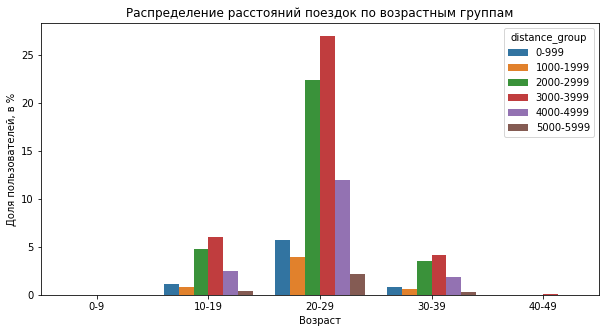

In [46]:
# построим график
plt.figure(figsize=(10, 5))
sns.barplot(data=users_grouped_by_distance_and_age, x='age_group', y='distance_perc_count', hue='distance_group')
plt.xlabel('Возраст')
plt.ylabel('Доля пользователей, в %')
plt.title('Распределение расстояний поездок по возрастным группам')
plt.show()

Среди всех групп пользователей по возрастам наблюдается аналогичная закономерность: большинство пользователей осуществляют поездки длительностью в 2000-4000 м., меньше всего - до 999 м. и более 5000 м. Наконец, рассмотрим распределение расстояния поездок по типу тарифа.

In [47]:
# группируем данные по типам подписку и диапазоном расстояний
users_grouped_by_distance_and_st = df_users_and_rides.groupby(['subscription_type', 'distance_group'])['user_id'].count()\
                                       .sort_values(ascending=False).reset_index()

# рассчитаем доли каждой возрастной группы в процентном соотношении
users_grouped_by_distance_and_st['distance_perc_count'] = (users_grouped_by_distance_and_st['user_id'] / 
                                                               users_grouped_by_distance_and_st['user_id'].sum()) * 100

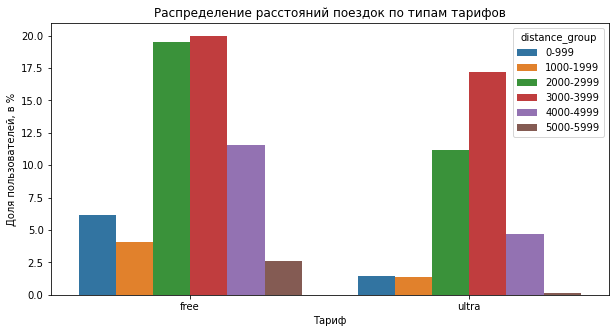

In [48]:
# построим график
plt.figure(figsize=(10, 5))
sns.barplot(data=users_grouped_by_distance_and_st, x='subscription_type', y='distance_perc_count', hue='distance_group')
plt.xlabel('Тариф')
plt.ylabel('Доля пользователей, в %')
plt.title('Распределение расстояний поездок по типам тарифов')
plt.show()

На графиках видно, что распределение расстояний, в целом, имеет схожее распределение по тарифам, однако есть некоторых отличия: так, пользователи с бесплатным тарифом в равной степени склонны к поездок от 2000 до 2999 м., при этом пользователи с платным тарифом ультра в большей степени склонны к поездкам от 3000 до 3999 м., при у пользователей с бесплатным тарифом поездок до 999 м. больше, чем от 1000 до 1999 м. Вполне вероятно, что это указывает на то, что пользователи, оплатившие тариф Ultra, более склонны к долгим поездкам, чем пользователи с бесплатным тарифам, хотя разница и не такая уж большая. Далее проведем анализ продолжительности поездок.

##### Анализ продолжительности поездок

Так как продолжительность поездок представляет собой непрерывную величину, то проанализируем данные по аналогии с расстоянием. Для начала рассмотрим продолжительность поездок на гистограмме и построим диаграмму размаха.

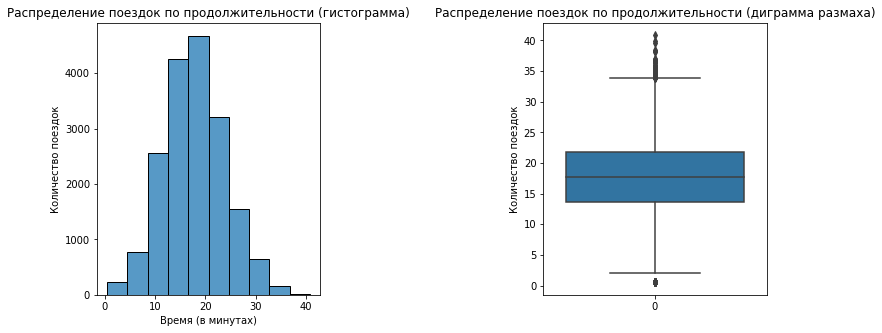

In [49]:
# зададим параметры для отображения графиков в одной строчке
figure, axes = plt.subplots(1, 2, figsize=(12, 5))
figure.subplots_adjust(wspace=1)

# построим графики
sns.histplot(data=rides['duration'], bins=10, ax=axes[0])
sns.boxplot(data=rides['duration'], ax=axes[1])

axes[0].set_title('Распределение поездок по продолжительности (гистограмма)')
axes[0].set_xlabel('Время (в минутах)')
axes[0].set_ylabel('Количество поездок')

axes[1].set_title('Распределение поездок по продолжительности (диграмма размаха)')
axes[1].set_ylabel('Количество поездок')

plt.show()

На гистограмме видно, что большинство поездок варьируются от 13-14 до 21 минуты. При этом медианное время в поедке составляет около 17, максимальное в районе 35 минут, а минимальное - около 2 минут, при этом имеются выбросы. Проанализирум данные в разрезе сезонности.

In [50]:
# группируем данные по месяцам и диапазоном расстояний, рассчитываем среднее значение
users_grouped_by_duration_and_month = rides.groupby('month')['duration'].mean().sort_values(ascending=False).reset_index()

# рассчитаем доли каждого месяца в процентном соотношении
users_grouped_by_duration_and_month['duration_perc_count'] = (users_grouped_by_duration_and_month['duration'] / 
                                                              users_grouped_by_duration_and_month['duration'].sum()) * 100

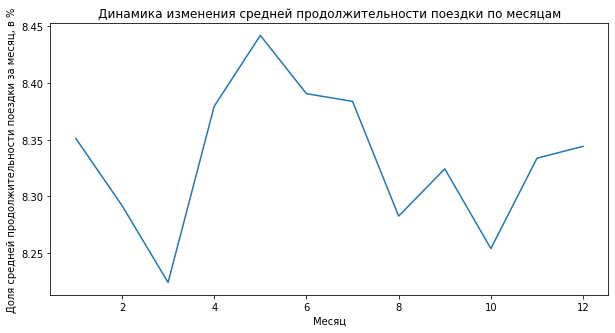

In [51]:
# построим график
plt.figure(figsize=(10, 5))
sns.lineplot(data=users_grouped_by_duration_and_month, x='month', y='duration_perc_count')
plt.xlabel('Месяц')
plt.ylabel('Доля средней продолжительности поездки за месяц, в %')
plt.title('Динамика изменения средней продолжительности поездки по месяцам')
plt.show()

График достаточно сильно похож на проанализированный ранее график динамики по расстояниям: фактор сезонности практически отсутствует, на что указывает разница в аналогичные 0.2% между максимальным и минимальным суммарным значением по продолжительности поездок. Похожий характер графика можно объяснить положительной корреляцией между продолжительностью и расстоянием поездки, проверим данную гипотезу при помощи коэффициента корреляции Пирсона и соответствующей диаграммы.

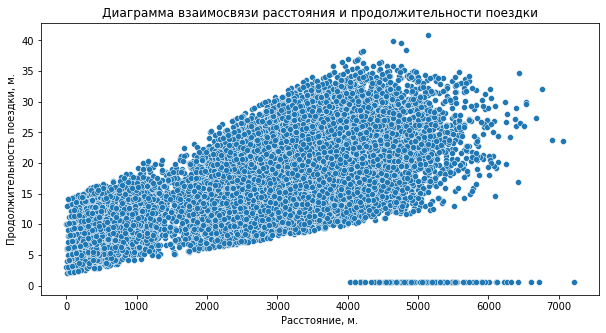

In [52]:
# построим диграмму корреляции
plt.figure(figsize=(10, 5))
sns.scatterplot(data=rides, x='distance', y='duration')
plt.xlabel('Расстояние, м.')
plt.ylabel('Продолжительность поездки, м.')
plt.title('Диаграмма взаимосвязи расстояния и продолжительности поездки')
plt.show()

In [53]:
# рассчитаем коэффициент корреляции Пирсона, чтобы убедиться в наличии положительной связи
print('Коэффициент корреляции Пирсона составляет ', rides['distance'].corr(rides['duration']).round(2))

Коэффициент корреляции Пирсона составляет  0.54


Полученное значение коэффициента корреляции является положительным, но составляет чуть больше 0.5, что указывает на наличие не сильной положительной связи: так, в части случаев по мере увеличения расстояния увеличивается и продолжительность поездки, однако не всегда и далеко не с одинаковой скоростью. Интересными являются точки, расположенные около 0 по оси Y (продолжительности поездки), но при этом с большими значениями по оси Х (расстоянию). Рассмотрим эти данные более подробно.

In [54]:
# сделаем срез данных по соответствующим параметрам и возьмем 5 первых значений из полученной выборки
rides.query('distance >= 4000 and duration < 1').head()

,user_id,distance,duration,date,month,distance_group
6531,701,4196.445201,0.5,2021-08-31,8,4000-4999
6570,704,4830.824371,0.5,2021-10-14,10,4000-4999
6680,712,4684.004397,0.5,2021-03-04,3,4000-4999
6695,713,5215.642710,0.5,2021-02-25,2,5000-5999
6768,718,5197.436649,0.5,2021-02-11,2,5000-5999


Из полученной таблицы сложно сказать в чем конкретная причина таких аномальных значений, рассмотрим поездки нескольких пользователей в указанные даты: есть гипотеза, что поездки пользователей были достаточно длинными, поэтому разделялись на несколько подпоездок со стандартным параметром времени (при этом прочие поездки с таким расстоянием считаются нормально).

In [55]:
# проверим данные по одному конкретному пользователю
rides.query('user_id == 701 and date == "2021-08-31"')

,user_id,distance,duration,date,month,distance_group
6530,701,3432.306093,17.44102,2021-08-31,8,3000-3999
6531,701,4196.445201,0.50000,2021-08-31,8,4000-4999


In [56]:
# проверим данные по одному конкретному пользователю
rides.query('user_id == 704 and date == "2021-10-14"')

,user_id,distance,duration,date,month,distance_group
6570,704,4830.824371,0.5,2021-10-14,10,4000-4999


In [57]:
# проверим данные по одному конкретному пользователю
rides.query('user_id == 712 and date == "2021-03-04"')

,user_id,distance,duration,date,month,distance_group
6680,712,4684.004397,0.5,2021-03-04,3,4000-4999


In [58]:
# проверим данные по одному конкретному пользователю
rides.query('user_id == 713 and date == "2021-02-25"')

,user_id,distance,duration,date,month,distance_group
6695,713,5215.64271,0.5,2021-02-25,2,5000-5999


In [59]:
# проверим данные по одному конкретному пользователю
rides.query('user_id == 718 and date == "2021-02-11"')

,user_id,distance,duration,date,month,distance_group
6768,718,5197.436649,0.5,2021-02-11,2,5000-5999


Гипотеза оказалась неверной: у 4 из 5 анализируемых пользователей в указанную дату была всего лишь одна поездка, таким образом, можно сделать промежуточный вывод о том, что в системе были какие-то неполадки и этот вопрос необходимо обсудить с разработчиками. Далее проанализируем продолжительность средних поездок по городам, перед этим категоризируем данные для упрощения проведения дальнейшего анализа.

In [60]:
# определяем диапазоны расстояния, шаг 10 минут
bins = [0, 10, 20, 30, 40, 50]

# создадим новую колонку с диапазонами при помощи соответствующего метода
df_users_and_rides['duration_group'] = pd.cut(df_users_and_rides['duration'], bins=bins, labels=[f"{i}-{i+9}" for i in range(0, 50, 10)])

In [61]:
# группируем данные по городам и диапазоном расстояний, рассчитываем среднее значение
users_grouped_by_duration_and_cities_b = df_users_and_rides.groupby('city')['duration'].mean().sort_values(ascending=False)\
                                         .reset_index()

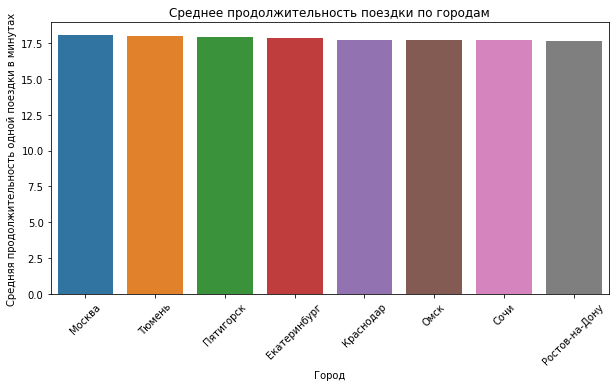

In [62]:
# построим график
plt.figure(figsize=(10, 5))
sns.barplot(data=users_grouped_by_duration_and_cities_b, x='city', y='duration')
plt.xlabel('Город')
plt.ylabel('Средняя продолжительность одной поездки в минутах')
plt.title('Среднее продолжительность поездки по городам')
plt.xticks(rotation=45)
plt.show()

На графике можно заметить, что средняя продолжительность поездки практически не отличается по городам и составляет 17.5 минут. Рассмотрим распределение средней продолжительности поездки по городам в зависимости от диапазона продолжительности.

In [63]:
# группируем данные по городам и диапазонам расстояний
users_grouped_by_duration_and_cities = df_users_and_rides.groupby(['city', 'duration_group'])['user_id'].count()\
                                       .sort_values(ascending=False).reset_index()

# рассчитаем доли каждого города в процентном соотношении
users_grouped_by_duration_and_cities['duration_perc_count'] = (users_grouped_by_duration_and_cities['user_id'] / 
                                                               users_grouped_by_duration_and_cities['user_id'].sum()) * 100

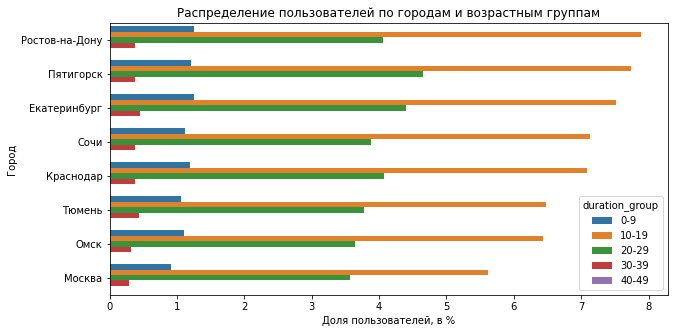

In [64]:
# построим график
plt.figure(figsize=(10, 5))
sns.barplot(data=users_grouped_by_duration_and_cities, x='duration_perc_count', y='city', hue='duration_group', orient='h')
plt.xlabel('Доля пользователей, в %')
plt.ylabel('Город')
plt.title('Распределение пользователей по городам и возрастным группам')
plt.show()

На графике видно, что во всех городах имеется схожая тенденция по распределению диапазона поездок: большинство пользователей в большей степени тратят на поездки от 10 до 29 минут, в меньшей - менее 9 и более 30 минут. Поездок в более 40 минут практически нет. Рассмотрим взаимосвязь поездок и возраста пользователей.

In [65]:
# группируем данные по возрастам и диапазонам расстояний, рассчитываем среднее значение
users_grouped_by_duration_and_age_b = df_users_and_rides.groupby('age_group')['duration'].mean().sort_values(ascending=False)\
                                      .reset_index()

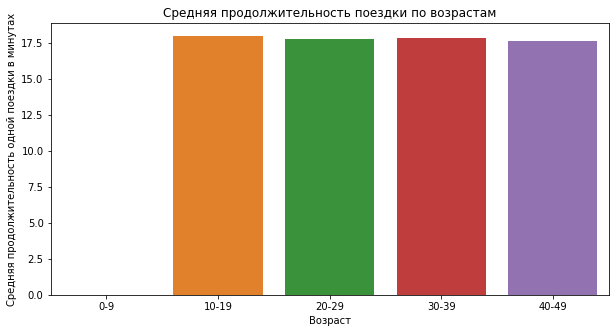

In [66]:
# построим график
plt.figure(figsize=(10, 5))
sns.barplot(data=users_grouped_by_duration_and_age_b, x='age_group', y='duration')
plt.xlabel('Возраст')
plt.ylabel('Средняя продолжительность одной поездки в минутах')
plt.title('Средняя продолжительность поездки по возрастам')
plt.show()

На графике видно, что средняя продолжительность поездок не зависит от возраста, так как средние значения всех возрастных групп идентичны и составляют 17.5 минут. Рассмотрим распределение диапазонов продолжительности поездок в зависимости от возраста.

In [67]:
# группируем данные по возрастам и диапазонам расстояний
users_grouped_by_duration_and_age = df_users_and_rides.groupby(['age_group', 'duration_group'])['user_id'].count()\
                                    .sort_values(ascending=False).reset_index()

# рассчитаем доли каждого возраста в процентном соотношении
users_grouped_by_duration_and_age['duration_perc_count'] = (users_grouped_by_duration_and_age['user_id'] / 
                                                            users_grouped_by_duration_and_age['user_id'].sum()) * 100

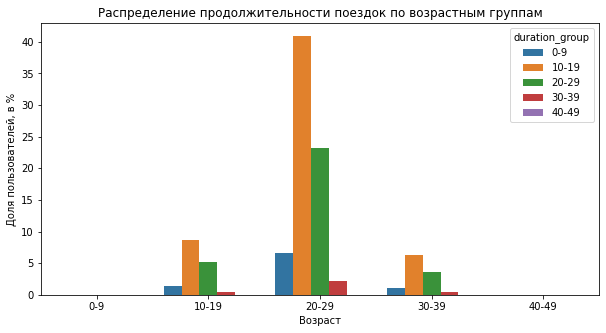

In [68]:
# построим график
plt.figure(figsize=(10, 5))
sns.barplot(data=users_grouped_by_duration_and_age, x='age_group', y='duration_perc_count', hue='duration_group')
plt.xlabel('Возраст')
plt.ylabel('Доля пользователей, в %')
plt.title('Распределение продолжительности поездок по возрастным группам')
plt.show()

На графике видно, что продолжительность поездок распределена идентично между всеми группами пользователей, на что ранее указывало и идентичное среднее значение поездки. Так, время поездки большинства пользователей составляет от 10 до 29 минут, а значения менее 10 и более 30 минут встречаются значительно реже. Также проанализируем взаимосвязь продолжительности поездок с типом тарифа.

In [69]:
# группируем данные по городам и диапазоном расстояний, рассчитываем среднее значение
users_grouped_by_duration_and_st_b = df_users_and_rides.groupby('subscription_type')['duration'].mean().sort_values(ascending=False)\
                                   .reset_index()

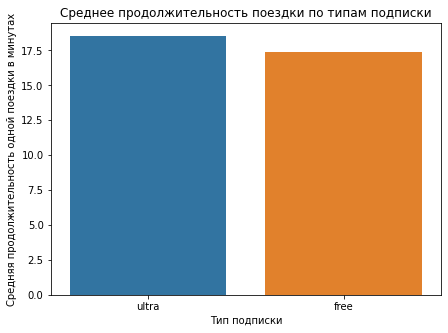

In [70]:
# построим график
plt.figure(figsize=(7, 5))
sns.barplot(data=users_grouped_by_duration_and_st_b, x='subscription_type', y='duration')
plt.xlabel('Тип подписки')
plt.ylabel('Средняя продолжительность одной поездки в минутах')
plt.title('Среднее продолжительность поездки по типам подписки')
plt.show()

Средняя продолжительность поездки на первый взгляд не сильно отличается от типа подписки. Тем не менее, данная гипотеза нуждается в статистической проверки, что будет проделано далее. Рассмотрим также распределение продолжительности поездки в зависимости от типа подписки.

In [71]:
# группируем данные по типам подписки и диапазонам расстояний
users_grouped_by_duration_and_st = df_users_and_rides.groupby(['subscription_type', 'duration_group'])['user_id'].count()\
                                    .sort_values(ascending=False).reset_index()

# рассчитаем доли каждого типа подписки в процентном соотношении
users_grouped_by_duration_and_st['duration_perc_count'] = (users_grouped_by_duration_and_st['user_id'] / 
                                                           users_grouped_by_duration_and_st['user_id'].sum()) * 100

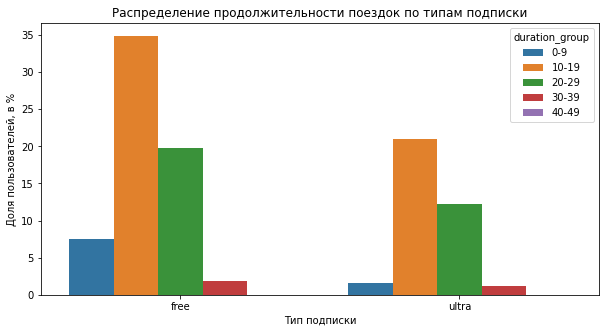

In [72]:
# построим график
plt.figure(figsize=(10, 5))
sns.barplot(data=users_grouped_by_duration_and_st, x='subscription_type', y='duration_perc_count', hue='duration_group')
plt.xlabel('Тип подписки')
plt.ylabel('Доля пользователей, в %')
plt.title('Распределение продолжительности поездок по типам подписки')
plt.show()

Распределение по типам подписки идентичны: большинство пользователей тратят на поездку от 10 до 29 минут, меньше - менее 10 и более 29 минут.

**Промежуточные выводы:**
- В данном разделе был проведен исследовательский анализ данных, в ходе которого было выявлено, что большинство поездок совершаются в Пятигорске, Ростове-на-Дону и Екатеринбурге, в меньшей степени - Москве, Омске и Тюмени. При этом разница между количествами поездок не сильно большая, однако важно учитывать совокупное население городов: например, в Москве проживают гораздо больше людей, чем в Пятигорске, однако пользователей из Москвы меньше. Вполне вероятно, что компания конкурирует с другими организациями в Москве, так как самокаты представлены там в больших вариациях, чем в регионах;
- Пользователей без подписки больше, чем тех, кто использует подписку Ultra. Тем не менее, практически половина пользователей (45%) используют платную подписку;
- Ядром аудитории являются пользователи 20-30 лет, а пользователи младше 18 и старше 35 встречаются гораздо реже. Вполне вероятно, что это связано с тем, что пользователи первой группы не обладают собственными средствами на аренду самоката или потребностью перемещаться на дальние расстояния, а у пользователей старше 35 лет есть собственный транспорт;
- Расстояние одной поездки составляет около 2000-4000 м. с медианным значением в 3100-3200 м., фактор сезонности отсутствует. При этом на продолжительность поездок не влияют города, возраст и тип подписки - данные распределены идентично.
- Продолжительность поездки составляет в среднем около 17-18 минут, при этом фактор сезонности также отсутствует. На продолжительность поездок также не влияют города, возраст и тип подписки, так как данные распределены аналогичным образом. 

В рамках данной части исследования были также проанализированы средние значения у двух и более переменных. Необходимо отметить, что выводы пока что не подкреплены статистическими тестами и относиться к ним нужно осторожно: для сравнения двух средних показаталей расстояния и продолжительности поездки по типам подписки будет проведен парный Т-тест в разделе 5, а для сравнения средних прочих категорий необходим дисперсионный анализ, так как признаков сравнивается 3 и более. Дисперсонный анализ не входит в рамки данного исследования, так как задача стоит только в анализе двух средних значений. 

#### Шаг 4. Объединение данных

Для проведения дальнейшего исследования объединим данные из трех датасетов, а также создадим два дополнительных на базе созданного: с пользователями с подпиской и без.

In [73]:
users

,user_id,name,age,city,subscription_type,age_group
0,1,Кира,22,Тюмень,ultra,20-29
1,2,Станислав,31,Омск,ultra,30-39
2,3,Алексей,20,Москва,ultra,10-19
3,4,Константин,26,Ростов-на-Дону,ultra,20-29
4,5,Адель,28,Омск,ultra,20-29
...,...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free,20-29
1530,1531,Никита,25,Пятигорск,free,20-29
1531,1532,Алексей,26,Тюмень,free,20-29
1532,1533,Степан,22,Краснодар,free,20-29


In [74]:
# объединяем данные
df = users.merge(rides, on='user_id', how='left').merge(subscriptions, on='subscription_type', how='inner')
df.head()

,user_id,name,age,city,subscription_type,age_group,distance,duration,date,month,distance_group,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,20-29,4409.919140,25.599769,2021-01-01,1,4000-4999,6,0,199
1,1,Кира,22,Тюмень,ultra,20-29,2617.592153,15.816871,2021-01-18,1,2000-2999,6,0,199
2,1,Кира,22,Тюмень,ultra,20-29,754.159807,6.232113,2021-04-20,4,0-999,6,0,199
3,1,Кира,22,Тюмень,ultra,20-29,2694.783254,18.511000,2021-08-11,8,2000-2999,6,0,199
4,1,Кира,22,Тюмень,ultra,20-29,4028.687306,26.265803,2021-08-28,8,4000-4999,6,0,199


In [75]:
# посмотрим на количества строк в исходных и полученной таблицах, чтобы определить корректность объединения
print('Количество строк исходной таблицы c информацией по пользователям:', users.shape[0],
      ', количество строк исходной таблицы c информацией по поездкам:', rides.shape[0],
      ', количество строк исходной таблицы c информацией по подпискам::', subscriptions.shape[0], 
      ', количество строк после объединения:', df.shape[0])

Количество строк исходной таблицы c информацией по пользователям: 1534 , количество строк исходной таблицы c информацией по поездкам: 18068 , количество строк исходной таблицы c информацией по подпискам:: 2 , количество строк после объединения: 18068


Так как наиболее крупной является таблица с информацией по поезкдам, а две остальные подключаются к ней, то данные были объединены корректно, так как количество строк одинаково.

Данные были объединены корректно. Создадим два воспомогательных датасета с фильтрацией по типу подписки.

In [76]:
# отфильтруем пользователей без подписки
df_filter_without_subscription = df.query('subscription_type == "free"')

In [77]:
# отфильтруем пользователей с подпиской
df_filter_with_subscription = df.query('subscription_type == "ultra"')

**Промежуточные выводы:** в данном разделе было проведено объединение трех датасетов в один и выделение двух датасетов на базе него с фильтрацией пользователей с и без подписок. Данные датасеты будут использованы в рамках этапа тестирования статистических гипотез.

#### Шаг 5. Подсчёт выручки

Создадим еще один датасет с агрегированной информацией по каждому пользователю, а также рассчитаем выручку, перед этим округлим длительность поездки в большую сторону для удобства рассчетов.

In [78]:
# округляем длительность поездки в большую сторону
df['duration'] = np.ceil(df['duration'])

In [79]:
# группируем данные для создания агрегированного датасета
df_grouped_by_user_id = df.groupby(['user_id', 'month']).agg({'distance': 'sum', 'name': 'count', 'duration': 'sum'})\
                        .reset_index()

# округлим продолжительность поездки до целых минут в большую сторону
df_grouped_by_user_id['duration']


# добавляем вспомогательный столбец с типом подписки, чтобы рассчитать выручку (после рассчета избавимся от него)
df_grouped_by_user_id = df_grouped_by_user_id.merge(df[['user_id', 'subscription_type', 'start_ride_price', \
                                                        'minute_price', 'subscription_fee']], on='user_id', how='left')

# переименуем колонку с количеством поездок для удобства проводимого анализа
df_grouped_by_user_id = df_grouped_by_user_id.rename(columns={'name': 'rides'})

Данные по пользователям и месяцам сгруппированы корректно: теперь в агрегированном датасете отображаются сгруппированные значения по пользователям и месяцам в разрезе суммарных расстояний, количества и времени поездок. Также рассчитаем выручку, для этого создадим дополнительный столбец.

In [80]:
# добавляем столбец с выручкой
df_grouped_by_user_id['revenue'] = df_grouped_by_user_id['subscription_fee'] + (df_grouped_by_user_id['start_ride_price'] \
                                        * df_grouped_by_user_id['rides'])  + (df_grouped_by_user_id['minute_price'] *  \
                                        df_grouped_by_user_id['duration'])

# удаляем вспомогательные столбцы, а также дубли, возникшие в ходе объединения датафреймов
df_grouped_by_user_id = df_grouped_by_user_id.drop(['start_ride_price', 'minute_price', 'subscription_fee'], \
                                                   axis=1).drop_duplicates().reset_index(drop=True)

In [81]:
# проверяем корректность рассчета выручки
df_grouped_by_user_id.head()

,user_id,month,distance,rides,duration,subscription_type,revenue
0,1,1,7027.511294,2,42.0,ultra,451.0
1,1,4,754.159807,1,7.0,ultra,241.0
2,1,8,6723.470560,2,46.0,ultra,475.0
3,1,10,5809.911100,2,32.0,ultra,391.0
4,1,11,7003.499363,3,56.0,ultra,535.0


**Промежуточные выводы:** в данном разделе была подготовлена таблица с агрегированными данными по суммарному расстоянию, количеству, продолжительности поездок и выручке, сгруппированные по пользователям и месяцам. Данная таблица будем использована в рамках проведения дальнейшего анализа при тестировании статистических гипотез.

#### Шаг 6. Проверка гипотез

В рамках данного этапа исследования углублимся в исследовательский анализ данных и проверим при помощи статистического аппарата следующие вопросы, выдвигаемые компанией:
- Тратят ли пользователи с подпиской больше времени на поездки?
- Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров (оптимальное время с точки зрения износа самокатов)?
- Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
- Дополнительный вопрос по выбору тесту в определенной ситуации;

##### Проверка гипотезы №1: пользователи с подпиской тратят больше времени на поездки

В рамках исследовательского анализа данных уже было проведено значение средних показателей по длительности поездок среди пользователей с и без подписок. На данном этапе исследования продолжим проводимый анализ и проверим с точки зрения статистического аппарата являются ли значения в средних показателях значимыми среди обоих сегментов. Для проведения проверки будем использовать правосторонний парный Т-тест по следующим соображениям:
- В нашем случаи генеральные совокупности не зависят друг от друга: мы не анализируем одних и тех же пользователей, например, до и после оформления подписки, а рассматриваем две независимые друг от друга выборки;
- Если опираться на центральную предельную теорему, то при достаточном объеме выборки (как правило, n => 30) и многократном извлечении выборки из генеральной совокупности выборочные средние будут близко распределены к нормальному, что является основанием для использования Т-теста;
- Дисперсии рассматриваемых нами генеральных совокупностей равны: так как у нас имеются данные только о некоторых пользователях приложения, то доступа к генеральной совокупности мы не имеем. При этом объем выборки достаточно крупный, поэтому есть основание полагать, что дисперсии будут +- равными.

Перед проведением Т-теста необходимо сформулировать нулевую и альтернативную гипотезы:
- H0: средняя продолжительность поездки пользователей в зависимости от типа подписки равна;
- H1: средняя продолжительность поездки пользователей с подпиской больше, чем пользователей без подписки;

Уровень значимости установим на 5%: если бы мы, например, проводили анализ медицинских исследований, то целесообразнее было бы взять 1%, но так как мы работаем с данными бизнеса, то зачастую берется уровень значимости в 5%.

In [82]:
# рассчитаем средние значения продолжительности поездки пользователей с подпиской и без
print('Средняя продолжительность поездки пользователей без подписки составляет ', df_filter_without_subscription['duration']\
      .mean().round(2),', а пользователей с подпиской - ', df_filter_with_subscription['duration'].mean().round(2), 'минут')

Средняя продолжительность поездки пользователей без подписки составляет  17.39 , а пользователей с подпиской -  18.54 минут


Простой расчет средних значений указывает на то, что пользователи с подпиской Ultra в среднем тратят больше времени на поездки, проверим, являются ли различия статистически значимыми.

In [83]:
# установим уровень значимости
alpha = 0.05

# применяем соответствующий метод для проверки гипотезы
test_results = st.ttest_ind(df_filter_with_subscription['duration'], 
                            df_filter_without_subscription['duration'],
                            alternative='greater')

# выводим результаты
print('P-значение:', test_results.pvalue)

if test_results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу: средние значения продолжительности поездки отличаются между группами пользователей')
else:
    print('Не можем отклонить нулевую гипотезу: средние значения продолжительности поездки не отличаются между группами \
           пользователей') 

P-значение: 1.2804098316645618e-34
Отклоняем нулевую гипотезу: средние значения продолжительности поездки отличаются между группами пользователей


Так как P-значение не превышает заданный уровень значимости, то мы можем отклонить нулевую гипотезу: так, в случае если нулевая гипотеза на самом деле окажется верной, то вероятность получить данные различия в средних и более крайне мала, так как не превышает установленный ранее уровень значимости. Далее протестируем гипотезу о среднем расстоянии. Вывод - пользователи с подпиской в среднем тратят больше времени на поездки, чем пользователи без подписки.

##### Проверка гипотезы №2: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Для проверки данной гипотезы также будем использовать Т-тест, так как он отвечает критериям выше, только вместо парного теста будем использовать стандартный, так как в этом случае нам необходимо сравнивать среднее значенеи выборки с некоторым установленным значением (в нашем случае 3130 метров, так как именно данное значение является оптимальным с точки зрения износа самоката). При этом будем использовать односторонний тест, так как нас интересует большие или равные 3130 м. значения.

Начнем с определения нулевой и альтернативной гипотез:
- H0: среднее расстояние одной поездки пользователей с подпиской равно 3130 метров;
- H1: среднее расстояние одной поездки пользователей с подпиской превышает 3130 метров.

Уровень значимости также установим на 5%.

In [84]:
# сохраним оптимальное значение в переменной
optimum_value = 3130

# применяем соответствующий метод для проверки гипотезы
test_results = st.ttest_1samp(df_filter_with_subscription['distance'], optimum_value, alternative='greater')

# выводим результаты
print('P-значение:', test_results.pvalue)

if test_results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу: среднее расстояние поездок пользователей с подпиской отличается от порогового в большую \
           сторону')
else:
    print('Не можем отклонить нулевую гипотезу: среднее расстояние поездок пользователей с подпиской не отличается от порогового \
           в большую сторону') 

P-значение: 0.9195368847849785
Не можем отклонить нулевую гипотезу: среднее расстояние поездок пользователей с подпиской не отличается от порогового            в большую сторону


Так как вероятность получить такое среднее расстояние поездок или более при корректности нулевой гипотезы представляет собой 91%, мы не можем отклонить нулевую гипотезу. Таким образом, можно говорить о том, что среднее расстояние пользователей с подпиской за одну поездку не превышает 3130 метров. Наконец, проверим гипотезу о выручке среди пользователей с подпиской и без.

##### Проверка гипотезы №3: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Для проверки данной гипотезы будем использовать датасет с агрегированными показателями (для этого мы оставили в нем столбец с типом подписки). За основу возьмем правосторонний парный Т-тест для независимых выборок, так как нам снова необходимо сравнить средние значения по двум группам пользователей - с подпиской и без, средним в этом случае выступает помесячная выручка.

Сформулируем нулевую и альтернативную гипотезы:
- H0: средняя выручка пользователей с подпиской за месяц равна аналогичному среднему показателю пользователей без подписки;
- H1: средняя выручка пользователей с подпиской за месяц выше аналогичному среднему показателю пользователей без подписки.

Уровень значимости также установим на 5%.

In [85]:
# применяем соответствующий метод для проверки гипотезы
test_results = st.ttest_ind(df_grouped_by_user_id.query('subscription_type == "ultra"')['revenue'], 
                            df_grouped_by_user_id.query('subscription_type == "free"')['revenue'],
                            alternative='greater')

# выводим результаты
print('P-значение:', test_results.pvalue)

if test_results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу: средняя выручка в месяц отличается у пользователей с подпиской в большую сторону, чем   \
           средняя выручка в месяц пользователей без подписки')
else:
    print('Не можем отклонить нулевую гипотезу: средняя выручка в месяц не отличается у пользователей с подпиской и без')

P-значение: 1.8850394384715216e-31
Отклоняем нулевую гипотезу: средняя выручка в месяц отличается у пользователей с подпиской в большую сторону, чем              средняя выручка в месяц пользователей без подписки


Таким образом, полученное значение позволяет нам отвергнуть нулевую гипотезу и сделать вывод о том, что средняя месячная выручка пользователей с подпиской отличается в большую сторону, чем средняя выручка пользователей без подписки, так как, в случае принятия нулевой гипотезы, вероятность получить такое же среднее и более достаточно мала.

##### Проектирование потенциального тестирования гипотезы

От бизнеса также поступила задача выбора теста для следующей ситуации: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест необходимо использовать в данном случае?

В условиях запроса речь идет о связанных выборках, так как в файле представлены метрики количества обращений одних и тех же пользователей в техподдержку. Таким образом, необходимо применять Т-тест для парных выборок (на практике нужно использовать метод `ttest_rel` модуля `stats` библиотеки `scipy`, основными условиями которого являются аналогичные озвученным выше, а также то, что выборки должны быть одинакового размера и порядок объектов в одной выборке соответствует порядку объектов в другой.

Если бы выборки были независимыми, то есть, например, в выборке А были представлены случайные пользователи, которые обращались в поддержку до изменений, а в выборке Б - после, то можно было бы обойтись Т-тестом для независимых выборок.

#### Шаг 7. Распределения

##### Задача №1

В рамках исследования была поставлена следующая задача: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10% пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%
Необходимо подобрать параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

В данном случае будем использовать биномиальное распределение, так как эксперимент:
- характеризуется многократными независимыми повторениями;
- каждое повторение (событие) может принимать 2 исхода - успех, то есть подписка продлена, и не успех - подписка не продлена.

Объявим функцию для определения необходимого количества промокодов при заданном уровне погрешности, а после построим график.

In [86]:
# задаем базовые параметры распределения
p = 0.1
k = 100
t = 0.05

# объявляем функцию для рассчета n
def calculate_n(p, k, t):
    n = 1
    # проходимся циклом по заданному условию, цикл прерывается при осуществлении условия (достижения 5% вероятности не достигнуть)
    # k успехов, в нашем случае - 100 продлений регистраций
    while True:
        probability = st.binom.cdf(k, n, p)
        if probability <= t:
            return n
        else:
            n += 1

In [87]:
print('Необходимое количество промокодов для получения 100 продлений подписок при заданном уровне погрешности в 5% составляет',\
      calculate_n(p, k, t))

Необходимое количество промокодов для получения 100 продлений подписок при заданном уровне погрешности в 5% составляет 1172


/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


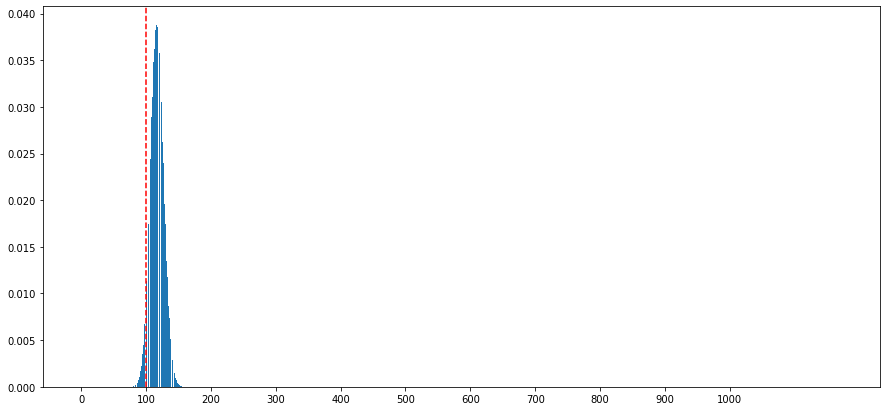

In [88]:
# построим график на базе полученного значения n
p = 0.1
n = calculate_n(p, k, t)
k = 100

distr = []

for k in range(0, n + 1):
    current_value = st.binom.pmf(k, n, p)
    distr.append(current_value)

plt.figure(figsize=(15, 7))
plt.bar(range(0, n + 1), distr)
plt.xticks(np.arange(0, 1001, 100))
plt.axvline(x=100, color='red', linestyle='--')
plt.show()

**Промежуточные выводы:** для 100 продлений подписок компании необходимо отправить 1172 промокода, учитывая вероятность недостижения результата в 5%.

###### Задача №2

В рамках исследования была поставлена следующая задача: отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 
399,5 тыс. пользователей.

Для решения данной задачи подойдет аппроксимация биномиального распределения нормальным: так, в случае открытия/не открытия уведомления у нас имеются 2 исхода, повторяющиеся в каждом эксперименте с одинаковой вероятностью. При этом нам важно посмотреть значение вероятности в хвостовой части, в данном случае - справа, а при наличиии большого количества экспериментов (n) и вероятности успеха (p), стремящейся к 0.5, биномиальное распределение отлично аппроксимируется нормальным для решения данного типа задач. Рассчитаем параметры математического ожидания и стандартного отклонения на базе параметров биномиального распределения, а дальше при помощи кумулятивной функции распределения рассчитаем вероятность правого хвоста до указанного в задаче значения.

In [89]:
# зададим параметры биномиального распределения
n = 1000000 
p = 0.4

# рассчитаем параметры аппроксимации биномиального распределения нормальным
mu = n * p 
sigma = sqrt(n * p * (1 - p))

# проведем аппроксимацию
distr = st.norm(mu, sigma) # задайте нормальное распределение

# найдем вероятность открытия уведомления НЕ более чем 399500 пользователями
result = distr.cdf(399500)
print('Вероятность открытия пользователями не более 399500 уведомлений составляет ', result.round(2))

Вероятность открытия пользователями не более 399500 уведомлений составляет  0.15


Так, можно говорить о том, что существует 0.75 вероятности того, что уведомление откроют больше 399500 пользователей. Рассмотрим проведенную аппроксимацию на графиках, чтобы удостовериться, что аппроксимация была осуществлена корректно.

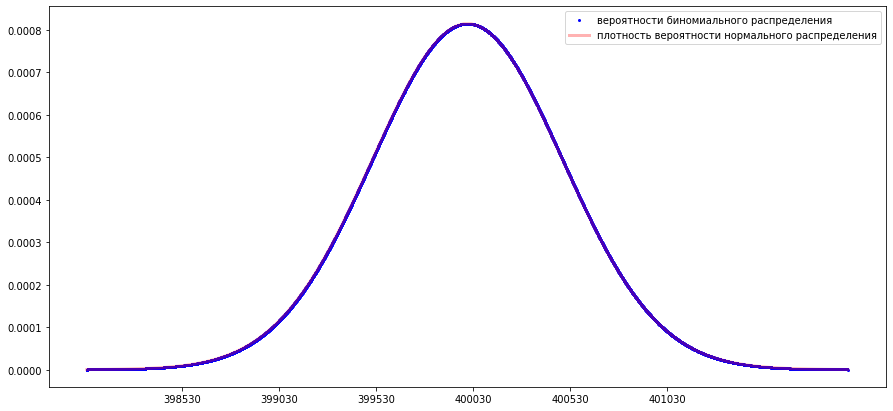

In [90]:
# зададим функцию для рассчета шага для визуализации графика нормального распределения
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

# обозначаем границы биномиального распределения для условия аппроксимации
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))

# построим график биномиального распределения
x = list(range(max(0, left), right))
plt.figure(figsize=(15, 7))
ax = plt.subplot()
ax.plot(x, st.binom.pmf(x, n, p), 'bo', ms=2,
        label='вероятности биномиального распределения')

# построим график нормального распределения
x = linspace(left, right, 100)
ax.plot(x, st.norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 500))
ax.set_xticks(x_ticks)
ax.legend(loc='best')

plt.show()

**Вопрос ревьюеру:** просидел над последней задачей 2 дня, так и не смог понять, почему значения по оси X так сильно едут. Буду благодарен за помощь в построении графика.

In [91]:
# проверяем полученные результаты на соответствие условиям аппроксимации
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')

Условие выполняется


Видим, что графики идентичны, условия аппроксимации в виде того, что среднее должно лежать в пределах +- трех стандартных отклонений.

**Промежуточные выводы:** в ходе проведенной аппроксимации биномиального распределения нормальным выясняли, что вероятность открытия уведомлений не более 350000 равно 0.15, а более - 0.75.

#### Шаг 8. Выводы
В рамках проведенного исследования были последовательно проделаны следующие этапы и сформулированы выводы:
- В рамках этапа **предобработки данных** данные были подготовлены к дальнейшей работе:
  - подключенные датасеты были проверены на наличие пропусков, в ходе работы пропусков выявлено не было, данные представлены в полном объеме;
  - также датасеты были проанализированы на наличие дубликатов, где только в одном датасете с информацией о пользователях были выявлены дубликаты, проверены и удалены, чтобы получить корректные результаты исследования в дальнейшем;
  - были проверены указанные типы данных на соответствия значениям в колонках, отклонения были найдены только в одном датасете с информацией по поездкам, что привело к изменению типа `object` на `datetime`. Также месяц был выделен в отдельную колонку `month` для проведения дальнейшего исследования.


- В рамках **исследовательского анализа данных** был проведен анализ данных в разрезе частоты встречаемости городов, соотношения пользователей с подпиской и без нее, возраста пользователей, расстояния и продолжительности одной поездки. В ходе работы были сформулированы следующие выводы:
  - большинство поездок совершаются в Пятигорске, Ростове-на-Дону и Екатеринбурге, в меньшей степени - Москве, Омске и Тюмени. При этом разница между количествами поездок не сильно большая, однако важно учитывать совокупное население городов: например, в Москве проживают гораздо больше людей, чем в Пятигорске, однако пользователей из Москвы меньше. Вполне вероятно, что компания конкурирует с другими организациями в Москве, так как самокаты представлены там в больших вариациях, чем в регионах;
  - пользователей без подписки больше, чем тех, кто использует подписку Ultra. Тем не менее, практически половина пользователей (45%) используют платную подписку;
  - ядром аудитории являются пользователи 20-30 лет, а пользователи младше 18 и старше 35 встречаются гораздо реже. Вполне вероятно, что это связано с тем, что пользователи первой группы не обладают собственными средствами на аренду самоката или потребностью перемещаться на дальние расстояния, а у пользователей старше 35 лет есть собственный транспорт;
  - расстояние одной поездки составляет около 2000-4000 м. с медианным значением в 3100-3200 м., фактор сезонности отсутствует. При этом на продолжительность поездок не влияют города, возраст и тип подписки - данные распределены идентично.
  - продолжительность поездки составляет в среднем около 17-18 минут, при этом фактор сезонности также отсутствует. На продолжительность поездок также не влияют города, возраст и тип подписки, так как данные распределены аналогичным образом. 


- В рамках **статистической проверки гипотез** от продуктовой команды были получены следующие выводы:
  - пользователи с подпиской в среднем тратят больше времени на поездки, чем пользователи без подписки;
  - среднее расстояние поездок пользователей с подпиской не отличается от порогового (3130 метров) в большую сторону;
  - средняя выручка в месяц отличается у пользователей с подпиской в большую сторону, чем средняя выручка в месяц пользователей без подписки;
  - в качестве теста для проведения дополнительного эксперимента был рекомендован Т-тест для парных выборок.
  
  
- В рамках **анализа распределений** и ответов на вопросы бизнеса были получены следующие выводы:
  - компании необходимо разослать 1172 промокода для того, чтобы получить 100 продлений подписок при заданном уровне погрешности в 5%. Если бы пользователи продляли подписку чаще, то количество промокодов можно было бы сократить, поэтому, возможно, имеет смысл поработать над механикой вовлеченности в приложении и оптимизацией коэффициента удержания.
  - в ходе проведенной аппроксимации биномиального распределения нормальным выясняли, что вероятность открытия уведомлений не более 350000 равно 0.15, а более - 0.75.
 
Полученные результаты исследования могут быть использованы компанией в дальнейшем для оптимизации продуктовых метрик и проведения дальнейших исследований.